In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
import sklearn

In [4]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('analytical_base_table.csv')

print(df.shape)

(1863, 41)


In [7]:
y = df.tx_price

X = df.drop('tx_price', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [9]:
print(len(X_train), len(X_test))

1490 373


## model pipeline

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [12]:
for key, value in pipelines.items():
    print(key, type(value))

enet <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
lasso <class 'sklearn.pipeline.Pipeline'>


### model hyperparameters

In [13]:
lasso_hyperparams = {
    'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

ridge_hyperparams = {
    'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

enet_hyperparams = {
    'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [14]:
rf_hyperparams = {
    'randomforestregressor__n_estimators':[100,200],
    'randomforestregressor__max_features':['auto', 'sqrt',0.33]
}

gb_hyperparams = {
    'gradientboostingregressor__n_estimators':[100,200],
    'gradientboostingregressor__learning_rate':[0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1,3,5]
}

In [15]:
hyperparameters = {
    'lasso': lasso_hyperparams,
    'ridge': ridge_hyperparams,
    'enet' : enet_hyperparams,
    'rf' : rf_hyperparams,
    'gb' : gb_hyperparams
}

## cross-validated training

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
fitted_models = {}

for name, pipeline in pipelines.items():
    clf = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)

    clf.fit(X_train, y_train)

    fitted_models[name] = clf

    print(name, 'has been fitted.')

/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

enet has been fitted.
gb has been fitted.
ridge has been fitted.
rf has been fitted.


/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dvarshne/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective di

lasso has been fitted.


In [18]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

enet has been fitted.
lasso has been fitted.
ridge has been fitted.
gb has been fitted.
rf has been fitted.


## choose the best one

In [19]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

enet 0.443781774253
lasso 0.422073703709
ridge 0.428436214155
gb 0.831427437828
rf 0.816916802707


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print(r2_score(y_test, pred))
    print(mean_absolute_error(y_test, pred))

enet
0.491399536781
80830.3777766
lasso
0.487428363728
80090.4841361
ridge
0.48828492637
80034.3138072
gb
0.794490374594
44819.2213674
rf
0.805201284882
44267.2752011


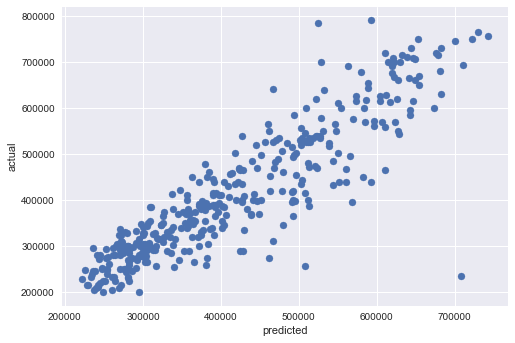

In [22]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [23]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

In [24]:
import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [1]:
#Objective was to get error < 70000
#while our model beats it by a very good margin with error 44267.2752011